<a href="https://colab.research.google.com/github/nyp-sit/nypi/blob/main/day2pm/Lab_Classification_CNN_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://drive.google.com/uc?id=1iBMNGCrSdaLK9SD6BjsuNjB1DjHVkLZl)

Welcome to the Colab! Before we get started here are a few pointers on Colab notebooks.

1. The notebook is composed of cells; cells can contain code which you can run by click on the play button.


2. To interrupt cell execution, click the ```Stop``` button on the side of the cell.

# Lab  : Classification with CNN
In this lab we will try to build a Concrete Crack Classifier to classify postive or negative. Postive means there is crack. Negative means no crack. We will collect 2 groups of images namely  Postive and Negative to be our dataset. The collected dataset will be used to train the Resnet50 CNN(Convolution Neural Network). Upon completion of the training, we will be able to classify an unknown image to give a prediction of the concrete crack.


We will build the model classifier based on the following steps

1.   Colab python virtual environment
2.   Import the libraries needed for the program
3.   Prepare the data
4.   Prepare the CNN model
5.   Train the model with the training set and evaluate its performance
6.   Use the trained model to classify input data



# 1. Colab python virtual environment

Colab is preinstalled with python virtual environment with the Tensorflow and Keras library.
We will use this default virtual environment for the execrise.




# 2. Import the libraries needed for the program
We will begin by importing the libraries that we need, mainly Keras.
Keras is based on a minimal framework that provides a simpler way to create deep learning models based on TensorFlow.
Keras contains useful functions for pre-preprocessing of image data and definition of convolution neural network.
Matplotlib is used for data visualization.



In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.resnet import ResNet50
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.inception_v3 import preprocess_input, decode_predictions



In [2]:
import keras
keras.__version__


'2.12.0'

# 3. Prepare the data

Usually in ML, we divide our data into 3 different sets

- Training Data: Collection of sample data used to train the neural network.

- Validation Data: Collection of sample data used to provide an unbiased evaluation of neural netowork during the training.

- Test Data: Collection of sample data used to evaluate the trained neural network.

### 3.1 Collect data for training and validation

We have pre-collected data that are stored in the following directory structure.

For train data, it is stored in the path ./Lab1dataset/data/train.
```
./Lab1dataset/data/train
                           |- Negative
                           |- Postive


```
Each of the above sub-directories(Negative, Positive) is stored with
500 different jpg images.


For validation data, it is stored in the path ./Lab1dataset/data/validation.
```
./Lab1dataset/data/validation.
                               |- Negative
                               |- Postive

```


For test data, it is stored in the path /Lab1dataset/test
```
./Lab1dataset/
    |- test

```
A few test images are stored in the above test directory.

Download the data and unzip it.




In [3]:
download_path = keras.utils.get_file(
    origin="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/nypi/Lab1dataset.zip",
    extract=True,
    cache_dir='./',
    cache_subdir='.'
)

We will define the following variables for the different data paths.

It will be easier for us to reference these paths in other sections of the code.

In [4]:
data_dir_path='Lab1dataset/'
train_data_dir = data_dir_path+'data/train/'
validation_data_dir = data_dir_path+'data/validation/'
prediction_data_dir = data_dir_path+'data/test/'

### Exercise
Let explore the images we had collected for the train dataset.

Display the following images from the train data.

* image 1 ( train_data_dir+"Negative/filename.jpg")
* image 2 (  train_data_dir+"Postive/filename.jpg")

What do you notice about the size of each of the image?
Read the printed image size ( height,width, color).

*color(1-greysacle, 3-color)

Why are we interested in the image size?

<details><summary>Click here for answer</summary>
<br/>

When we build a Convolution Neural Network(CNN), we usually specify a fixed input size. Therefore we need to pre-process the collected images to the same size as the expected input before we can do training.

<br/>
</details>

(227, 227, 3)


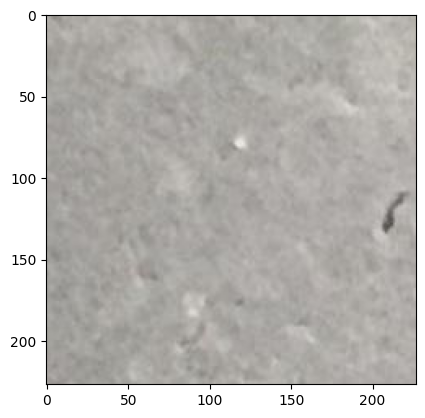

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TODO: complete the code below
#image 1
# img = mpimg.imread(#add code)
img = mpimg.imread( train_data_dir+"Negative/00001.jpg")
print(img.shape)
imgplot = plt.imshow(img)


(227, 227, 3)


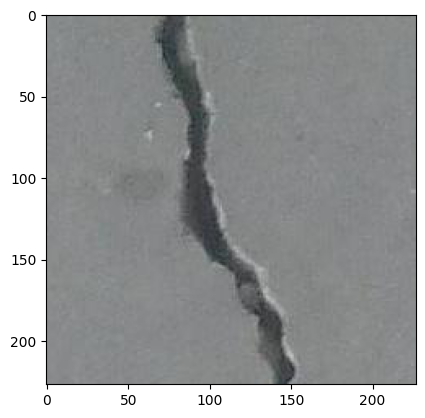

In [6]:
# TODO: complete the code below
#image 2
# img = mpimg.imread(#add code)
img = mpimg.imread(train_data_dir+"Postive/00001.jpg")
print(img.shape)
imgplot = plt.imshow(img)

### 3.2 Prepare Data for training and validation

From the previous exercise, we noticed that the collected data need to be pre-processed before we can use it to train our CNN. In this section, we will look at some of the methods that can help us to do data pre-processing.

Data augmentation is a strategy that enables developer to significantly increase the diversity of data available through data pre-processing.

Data augmentation techniques such as resizing, rotation, and cropping are commonly used to train large neural networks.


![image](https://drive.google.com/uc?id=1Y1V7I79GthoHvqjVYfgaCZHloDh1VZ2z)

Kera provides us a function to do data augmentation. We can configure the parameters in the function to achieve the required image pre-processing. We will do some of the parameters configuration in the exercise.




### Exercise
We will configure the image augmentation using the Keras data augmentation layers.
Here are some of the layers:

`RandomFlip(mode)` where mode can be 'horizontal', 'vertical' or 'horizontal_and_vertical'

`RandomRotation(factor)` where factor is a float represented as fraction of 2 Pi,representing lower and upper bound for rotating clockwise and counter-clockwise, e.g. 0.2 means rotating clock-wise and anti-clockwise 20% * 2Pi or 72 degrees.

There are many more layers such as RandomBrightness, RandomContrast, RandomZoom, and so on.

Set the appropriate parameter values in the following codes marked with #add code

The code below also shows how we can use `keras.utils.image_dataset_from_directory` to create dataset generator from the respective train and validation directory. It also automatically resize the images to the specified `image_size`. We also specify that we want it to generate the labels that are 'categorical', i.e. one-hot-encoded.

In addition, we want our data generator to yield a batch_size of samples per iteration.

We will put the above pre-processing steps for train and validation inside the function name PrepareData().


In [7]:
#Prepare Data for training and validation

aug = False

def PrepareData(img_height, img_width, batch_size, input_preprocess_fn):

    # resize_and_rescale = keras.Sequential([
    #     keras.layers.Resizing(img_height, img_width),
    #    # keras.layers.Rescaling(1/255.)
    # ])

    data_augmentation = keras.Sequential([
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),
    ])

    train_ds = keras.utils.image_dataset_from_directory(
        train_data_dir,
        image_size = (img_height, img_width),
        batch_size=batch_size,
        label_mode='categorical'
    )

    val_ds = keras.utils.image_dataset_from_directory(
        validation_data_dir,
        image_size = (img_height, img_width),
        batch_size=batch_size,
        label_mode='categorical'
    )

    import tensorflow as tf

    train_ds = train_ds.map(lambda x, y: (input_preprocess_fn(x), y))

    if aug:
        train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                        num_parallel_calls=tf.data.AUTOTUNE)

    val_ds = val_ds.map(lambda x, y: (input_preprocess_fn(x), y))

    return train_ds, val_ds

### 3.3 Get the total number of predicted classes/labels

The label of the training samples are determined by the subdirectory name, e.g.In the train sub-directories, Honda is the label to tag to all the images collected for that group.

In our case, the number of predicted classes (or labels) are based on the number of sub-directories in the train folder.


We are going to find the number of classes and the labels for our collected data.

Where can we get the information for the number of classes and the Label names?
Look for the directory where we stored our train data. Complete the following code.

Observe the number of classes printed at the output. Why the number of classes is 2?

<details><summary>Click here for answer</summary>
<br/>
In our classification problem, we need to classify the concrete as whether has crack or not having crack. Therefore the classes is defined to be 2.

The number of classes is to allow the CNN to predict the number of outputs.

<br/>
</details>





In [8]:
# Gets the total no. of classes and labels

class_names =  keras.utils.image_dataset_from_directory(train_data_dir, label_mode='categorical').class_names
print('class_names', class_names)
print("number of classes="+ str(len(class_names)))

Found 1000 files belonging to 2 classes.
class_names ['Negative', 'Postive']
number of classes=2


# 4. Prepare the CNN Model

### 4.1 CNN Convolution Netural Network


![image](https://drive.google.com/uc?id=1TvHHScdeRsKcQTNiVpbKu1lUnJlLQLim)

There are many CNN implementation, such as LeNet, AlexNet, VGG, GoogLeNet, ResNet and more.

In this lab we will be using ResNet50 CNN.

The ResNet50 is built from the different combination of the following layers

        *   Conv2D-> number of feature maps, feature map size (width x height)
        *   Activation function -> relu , sigmoid
        *   MaxPooling-> kernel size (width x height)

together with the output layers

        *   Flatten-> 2D to 1D
        *   Dense layer->number of neutrons
        *   Activation Function->softmax(probability of each the classes)



### Execrise
We have a brief understanding of how the ResNet50 layers are formed. In this exercise, we will customise our ResNet50 to train our pre-process dataset.

Assuming we want to have input image size of (128, 128, 3) (height, width, channels). In the code below, change the function `ResNet50()` to have the the specified input size.

- In the following code, goto function `ResNet50()` set the parameters `input_size` to (height, width, channels)->(128,128,3)

Based on the number of classes we have discuss in the previous exercise 3.3, what do you think is the number of neurons required in the output Dense layer?

- Add the number of neurons required in the output Dense layer?


Run the function `compileModel()` to build the custom ResNet50.

Observe the print out of the ResNet50 layers. What have we customised in our ResNet50 CNN?

<details><summary>Click here for answer</summary>
<br/>

We have setted our customise ResNet50 with the input size (128,128,3), and number of outputs to be 2.


<br/>
</details>



In [9]:
def compileModel(img_height, img_width):

    print("compiling model")

    learning_rate=0.001

     ## TODO: Add in the input size
    conv_base = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(img_height, img_width, 3))

    # freeze all the layers in convolutional base, as we are only training the classification head
    for layer in conv_base.layers:
        layer.trainable = False

    model = models.Sequential()
    model.add(conv_base)

    #Add dense and classification layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    ## TODO: Change the Output Dense layer to have the correct number of neurons
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer= optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])


    return model

In [10]:
model = compileModel(128, 128)
model.summary(expand_nested=True)

compiling model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)      [(None, 128, 128, 3)]     0         |
|                                                               |
| conv1_pad (ZeroPadding2D)  (None, 134, 134, 3)      0         |
|                                                               |
| conv1_conv (Conv2D)       (None, 64, 64, 64)        9472      |
|                                                               |
| conv1_bn (BatchNormalizatio  (None, 64, 64, 64)     256       |
| n)                                                            |
|                                                               |
| conv1_relu (Activation)   (None, 64, 64, 64)        0         |
|                                       

# 5. Train the model with the training set and evaluate it performance

### 5.1 Train and validate the model


![image](https://drive.google.com/uc?id=1E4kipAQNfq9vKY-cNRmb_y2Dj_t4gfBN)

With the preprocessed training and validation dataset and our defined model. We can start to preform the training process.
As part of the training, we will also need to set some parameter values in the training function (the ``fit()``)

- Set the number of epoch to  indicates the number of passes of the entire training dataset the model has to complete.

- When we have a huge data set it not possible to load the entire data to run one epoch of training. Setting Step per epoch allow huge data to divide into batches to complete entire training.

We save the final training iteration weights into to a binary data format(.h5).

In the trainModel() function it will save the final iteration weights into a file "custom_final.h5".
We also set a ModelCheckpoint() function to monitor the validation accuracy in each of the training iterations. This function will save the weights into a file "custom_best.h5" with the best validation accuracy.


In [11]:
best_model_cb = keras.callbacks.ModelCheckpoint(data_dir_path+'custom_best.h5', monitor='val_accuracy',save_best_only=True,save_weights_only=True,verbose=1, mode='max')

def trainModel(train_ds, validation_ds, model):

    print("starting training.... ")
    hist = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=validation_ds,
        callbacks=[best_model_cb]
    )

    model.save_weights(data_dir_path+'custom_last.h5') # Saving the compile weights

    return model

This following function plotVal_plotLoss() is to plot the accuracy and loss result of the model during the training.

- Loss is a number that indicates the difference between the model's prediction output with the ground truth.

- Accuracy is a metric that can be applied to classification tasks only. It describes just what percentage of your train/test data are classified correctly.


In [12]:
# This function generates graphs of the loss and the accuracy of the model
def plotVal_plotLoss (model) :
    history = model.history
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()


### Exercise

Now we are ready to start the training process.

From section 4.1 exercise, we have set the ResNet50 input size. We preprocess our data to the same width and height before it can be used for the training.

- Set the `PrepareData()` with the correct ``image_height`` and ``Image_width``
<details><summary>Click here for answer</summary>
<br/>
        image_height=128
        Image_width=128
<br/>
</details>


Set the number of epoch to 5
- At the  variable epochs set a number(integer number)


The `trainModel()` function will start the training.

- Our train set has 1000 samples, and we are using a batch size of 50, how many training steps are required to go through all the samples? Observe the training output and see whether the number of steps is the same as your answer.
<details><summary>Click here for answer</summary>
<br/>
     Step per ecoph = 1000/50 = 20
<br/>
</details>


You can vary the epochs to observe the model accuracy and loss values.

- What do you notice when epochs are varied?
<details><summary>Click here for answer</summary>
<br/>
Typically the increase in the epochs will reduce the loss and improve the prediction accuracy.

<br/>
</details>




In [13]:
# dimensions of our images.
## TODO: Set the image width and height
img_height, img_width = 128, 128

# The batch size represents the total amount of pictures that are included in each iteration.
## TODO: Set the batch size
batch_size = 50

#Prepare data
input_preprocess_fn = keras.applications.resnet.preprocess_input

train_data, validation_data = PrepareData(img_height, img_width, batch_size, input_preprocess_fn)

#Load Model
model=compileModel(img_height, img_width)

## TODO: Set the number to training iterations
epochs = 5

#Start the training model
trainModel(train_data, validation_data, model)



Found 1000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
compiling model
starting training.... 
Epoch 1/5
20/20 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9490
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to Lab1dataset/custom_best.h5
20/20 [==============================] - 12s 194ms/step - loss: 0.1474 - accuracy: 0.9490 - val_loss: 2.4266e-04 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9970
Epoch 2: val_accuracy did not improve from 1.00000
20/20 [==============================] - 2s 86ms/step - loss: 0.0217 - accuracy: 0.9970 - val_loss: 1.2399e-04 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9960
Epoch 3: val_accuracy did not improve from 1.00000
20/20 [==============================] - 2s 95ms/step - loss: 0.0076 - accuracy: 0.9960 - val_loss: 3.0043e-04 - val_accuracy: 1.0000

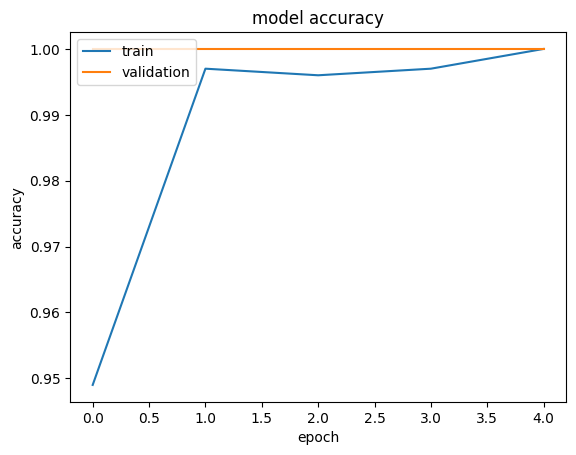

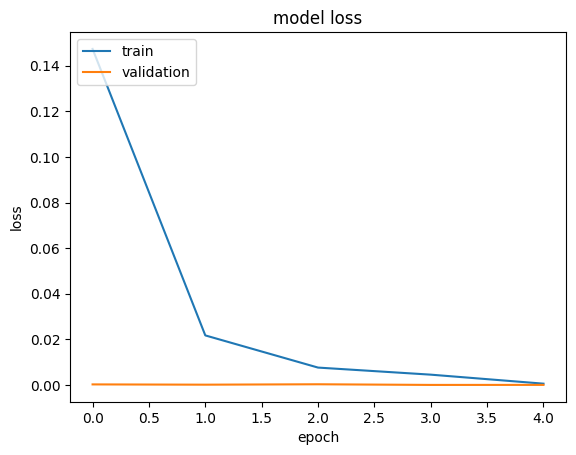

In [14]:
plotVal_plotLoss(model)

# 6. Use the trained model to classify input data



### 6.1 Setup a predict image function

After completed the training for the customised ResNet50 CNN model. The following predictImg() function will use the trained model to predict the output of an unknown image.


In [15]:
def predictImg(path, img_height, img_width ,model):
    imagep = keras.utils.load_img(path, target_size=(img_height, img_width))
    x = keras.utils.img_to_array(imagep)
    x = input_preprocess_fn(x)
    x = np.expand_dims(x, axis=0) # add in batch axis
    prediction = model.predict(x) # Extract the prediction made by the model
    label_idx = np.argmax(prediction[0])
    predicted_label = class_names[label_idx]

    return predicted_label

In [16]:
def findLabel(test, threshold, path):
    if (max(test[0]) < threshold):
        print("no class could be defined for " + path + " with threshold 0.85")
    else:
        m = max(test[0])
        index = [i for i, j in enumerate(list(test[0])) if j == m]
        #labeler(index[0], path)
        label = class_names[index[0]]
        print("The image '" + path + "' belongs to class: " + label) # Prints the prediction

### Exercise

Now we are ready to use the trained model to predict the image.

First we need to load our Resnet50 CNN model with the trained weights.
- During traning fit() function call the ModelCheckPoint() to monitor and save the weights with best validation accuracy. Find where is the directory and file name for best weights file. Input into the model.load_weights() function in the following code.
<details><summary>Click here for answer</summary>
<br/>
data_dir_path+'custom_best.h5'
<br/>
</details>


Next we need to specify an unknown images file for prediction.
- Find a test image file in the directory './Lab1dataset/prediction_images/' pass into  predictImg() function
<details><summary>Click here for answer</summary>
<br/>
    eg.    prediction_data_dir+"honda1.jpg"
<br/>
</details>

Try to load different test images to predict the output. You can check the predicted label against the test image file name. The test image file name is the ground truth label.


In [17]:
model_best = compileModel(128, 128)

## TODO: Set the best-trained weigth dir and file name
model_best.load_weights(data_dir_path+"custom_last.h5")


compiling model


In [18]:
## TODO: Set the unknown image dir and file name
predictImg(prediction_data_dir+"postive9.jpg", 128, 128 , model_best)

1/1 [==============================] - 1s 1s/step


'Postive'

In [19]:
## TODO: Set the unknown image dir and file name
predictImg(prediction_data_dir+"negative4.jpg", 128, 128 , model_best)

1/1 [==============================] - 0s 27ms/step


'Negative'